In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

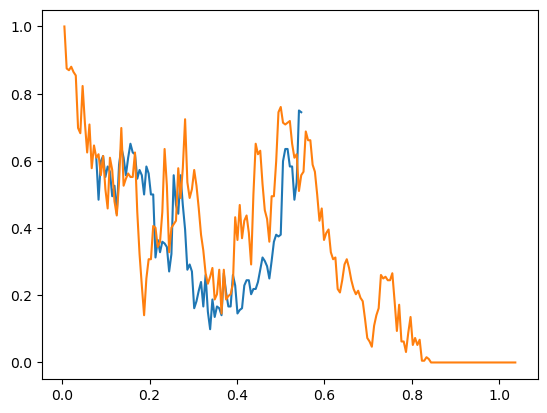

In [43]:
path='/Users/ruhe/Desktop/ga2o3/FP/DFT/mix/fcc'
os.chdir(path)
nFP=[(i+13)/(320*0.6) for i in range(2,93)]
nfcc=[]
for i in range(2,93):
    df=pd.read_csv('fcc.{}'.format(i),skiprows=2,sep=' ', header=None)
    nfcc.append(df.iloc[1,1]/(320*0.6))
plt.plot(nFP,nfcc,label='DFT_MD')
path='/Users/ruhe/Desktop/ga2o3/FP/DFT/npt0/mix/fcc'
os.chdir(path)
nFP=[(i+1)/(320*0.6) for i in range(199)]
nfcc=[]
for i in range(199):
    df=pd.read_csv('fcc.{}'.format(i),skiprows=2,sep=' ', header=None)
    nfcc.append(df.iloc[1,1]/(320*0.6))
plt.plot(nFP,nfcc,label='MD')
#path='/Users/ruhe/Desktop/ga2o3/FP/mix/fcc'
#os.chdir(path)
#nFP=[(i+1)/(1280*0.6) for i in range(1999)]
#nfcc=[]
#for i in range(1999):
    #df=pd.read_csv('fcc.{}'.format(i),skiprows=2,sep=' ', header=None)
    #nfcc.append(df.iloc[1,1]/(1280*0.6))
#plt.plot(nFP,nfcc,label='MD2')
#plt.ylabel('FCC percentage')
#plt.xlabel('dpO')
#plt.legend()

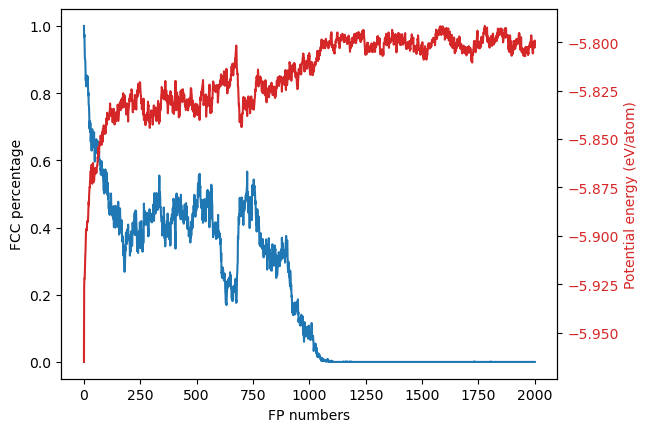

In [96]:
path='/Users/ruhe/Desktop/ga2o3/FP/mix/fcc'
os.chdir(path)
nFP=[i for i in range(2001)]
nfcc=[]
for i in range(2001):
    df=pd.read_csv('fcc.{}'.format(i),skiprows=2,sep=' ', header=None)
    nfcc.append(df.iloc[1,1]/(1280*0.6))
fig, ax1 = plt.subplots()
ax1.plot(nFP,nfcc,label='MD')
ax1.set_ylabel('FCC percentage')
ax1.set_xlabel('FP numbers')
ax2 = ax1.twinx()
path='/Users/ruhe/Desktop/ga2o3/FP/mix/log_file/log_file'
os.chdir(path) 
ape_mix=np.zeros(2001)
ape_mix[0]=-5.965
for i in range(1,2001):
    fn2=str(i)+'.log'
    #custom step dt time temp press v_ape v_ake etotal c_FP_distance
    log= pd.read_csv(fn2, sep=' ',header=None)
    log.columns=['Timestep','t','T','press','ape','ake','etotal','FP_distance']
    ape_mix[i]=log['ape'][-1:]
ax2.plot(nFP, ape_mix,color='tab:red')
ax2.set_ylabel('Potential energy (eV/atom)',color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')


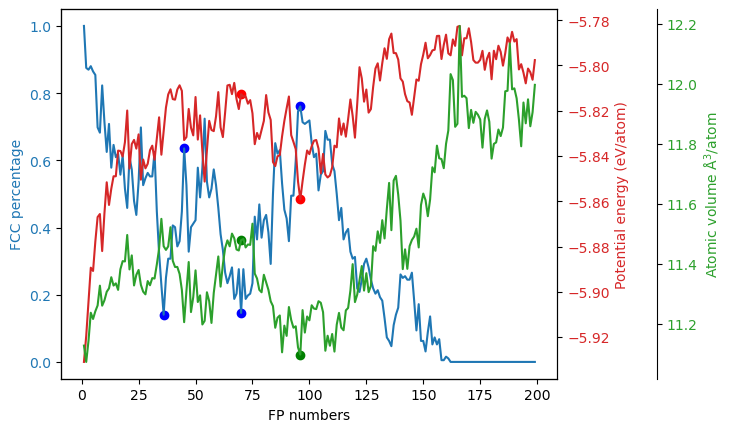

In [95]:
path='/Users/ruhe/Desktop/ga2o3/FP/DFT/npt0/mix/fcc'
os.chdir(path)
nFP=[(i+1) for i in range(199)]
nfcc=[]
for i in range(199):
    df=pd.read_csv('fcc.{}'.format(i),skiprows=2,sep=' ', header=None)
    nfcc.append(df.iloc[1,1] /(320*0.6))
fig, ax1 = plt.subplots()
ax1.plot(nFP,nfcc,color='tab:blue')
ax1.set_ylabel('FCC percentage',color='tab:blue')
ax1.set_xlabel('FP numbers')
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.scatter(36,nfcc[35],color='blue')
plt.scatter(45,nfcc[44],color='blue')
plt.scatter(70,nfcc[69],color='blue')
plt.scatter(96,nfcc[95],color='blue')
ax2 = ax1.twinx()
path='/Users/ruhe/Desktop/ga2o3/FP/DFT/npt0/mix/log_file'
os.chdir(path) 
ape_mix=np.zeros(199)
avol_mix=np.zeros(199)
for i in range(1,200):
    fn2=str(i)+'.log'
     # custom step dt time temp press v_ape v_ake v_avol etotal c_FP_distance
    log= pd.read_csv(fn2, sep=' ',header=None)
    log.columns=['Timestep','t','T','press','ape','ake','avol','etotal','FP_distance']
    ape_mix[i-1]=log['ape'][-1:]
    avol_mix[i-1]=log['avol'][-1:]
ax2.spines['right'].set_position(('axes', 1.0))
ax2.plot(nFP, ape_mix,color='tab:red')
ax2.set_ylabel('Potential energy (eV/atom)',color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
#plt.scatter(36,ape_mix[35],color='red')
#plt.scatter(45,ape_mix[44],color='red')
plt.scatter(70,ape_mix[69],color='red')
plt.scatter(96,ape_mix[95],color='red')

ax3 = ax1.twinx()
ax3.plot(nFP, avol_mix,color='tab:green')
# Offset the last y-axis to the right
ax3.spines['right'].set_position(('axes',1.2))
ax3.set_ylabel('Atomic volume $\mathrm{\AA^3/atom}$',color='tab:green')
ax3.tick_params(axis='y', labelcolor='tab:green')
#plt.scatter(36,avol_mix[35],color='green')
#plt.scatter(45,avol_mix[44],color='green')
plt.scatter(70,avol_mix[69],color='green')
plt.scatter(96,avol_mix[95],color='green')